**BDM-3014-AI Introduction**
* Pet Finder Analytics


In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [4]:
#Loading libraries
import pandas as pd
import numpy as np

#Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [5]:
#Loading dataset
df_train = pd.read_csv("train.csv", header = 0)
df_image = pd.read_csv("image_features.csv", header = 0)
df_test = pd.read_csv("test.csv", header = 0)

#Displaying First 5 rows
df_train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


### **Data Description**

* Overviewing of data types, missing data, and number of rows

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

* The distribution of numerical and categorical data

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,14993.0,1.457614,0.498217,1.0,1.0,1.0,2.0,2.0
Age,14993.0,10.452078,18.155790,0.0,2.0,3.0,12.0,255.0
Breed1,14993.0,265.272594,60.056818,0.0,265.0,266.0,307.0,307.0
Breed2,14993.0,74.009738,123.011575,0.0,0.0,0.0,179.0,307.0
Gender,14993.0,1.776162,0.681592,1.0,1.0,2.0,2.0,3.0
Color1,14993.0,2.234176,1.745225,1.0,1.0,2.0,3.0,7.0
Color2,14993.0,3.222837,2.742562,0.0,0.0,2.0,6.0,7.0
Color3,14993.0,1.882012,2.984086,0.0,0.0,0.0,5.0,7.0
MaturitySize,14993.0,1.862002,0.547959,1.0,2.0,2.0,2.0,4.0
FurLength,14993.0,1.467485,0.599070,1.0,1.0,1.0,2.0,3.0


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          3972 non-null   int64  
 1   Name          3561 non-null   object 
 2   Age           3972 non-null   int64  
 3   Breed1        3972 non-null   int64  
 4   Breed2        3972 non-null   int64  
 5   Gender        3972 non-null   int64  
 6   Color1        3972 non-null   int64  
 7   Color2        3972 non-null   int64  
 8   Color3        3972 non-null   int64  
 9   MaturitySize  3972 non-null   int64  
 10  FurLength     3972 non-null   int64  
 11  Vaccinated    3972 non-null   int64  
 12  Dewormed      3972 non-null   int64  
 13  Sterilized    3972 non-null   int64  
 14  Health        3972 non-null   int64  
 15  Quantity      3972 non-null   int64  
 16  Fee           3972 non-null   int64  
 17  State         3972 non-null   int64  
 18  RescuerID     3972 non-null 

In [9]:
df_train.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

## Data Wrangling/Encoding:


* Data inspection
* Handling missing values
* Outlier detection
* Data transformation

#### Data Inspection

In [10]:
#Data Inspection

#Looking for missing values
df_train.isna()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#Checking for columns with missing values
df_train.isnull().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

#### Treating missing values for Names, checking and removing for duplicates

In [13]:
#Filling missing values with Unknown

df_train['Name'].fillna("Unknown", inplace = True)
df_train['Description'].fillna("Unknown", inplace = True)

df_test['Name'].fillna("Unknown", inplace = True)
df_test['Description'].fillna("Unknown", inplace = True)

#Filling missing numeric values with median and mean

df_train['Age'].replace(0, df_train['Age'].median(), inplace = True)
df_train['Fee'].replace(0, df_train['Fee'].mean(), inplace = True)

df_test['Age'].replace(0, df_test['Age'].median(), inplace = True)
df_test['Fee'].replace(0, df_test['Fee'].mean(), inplace = True)

#Checking for and remove duplicate rows
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

df_train.info()
print('_'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           14993 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  float64
 17  State          14993 non-null  int64  
 18  Rescue

In [14]:
#Checking for missing values again
df_train.isnull().sum()

Type             0
Name             0
Age              0
Breed1           0
Breed2           0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
State            0
RescuerID        0
VideoAmt         0
Description      0
PetID            0
PhotoAmt         0
AdoptionSpeed    0
dtype: int64

### Outliers detection

(array([  113,   145,   513,  1057,  1141,  1363,  1703,  1858,  1867,
        2263,  2497,  2767,  2830,  3195,  3684,  3931,  3998,  4071,
        4344,  4456,  4522,  4617,  4796,  5007,  5067,  5160,  5485,
        5535,  5569,  5593,  6264,  6569,  6618,  6666,  6722,  6894,
        6992,  7166,  7250,  7289,  7482,  7512,  7614,  7823,  8058,
        8065,  8304,  8492,  8944,  9267,  9378,  9563,  9970, 10089,
       10128, 10337, 10426, 10501, 10658, 10737, 10917, 11087, 11172,
       11216, 11314, 11523, 11605, 11640, 11968, 12526, 12575, 12621,
       12737, 12855, 12947, 13079, 13398, 13493, 13665, 13744, 14189,
       14303, 14637, 14732]),)


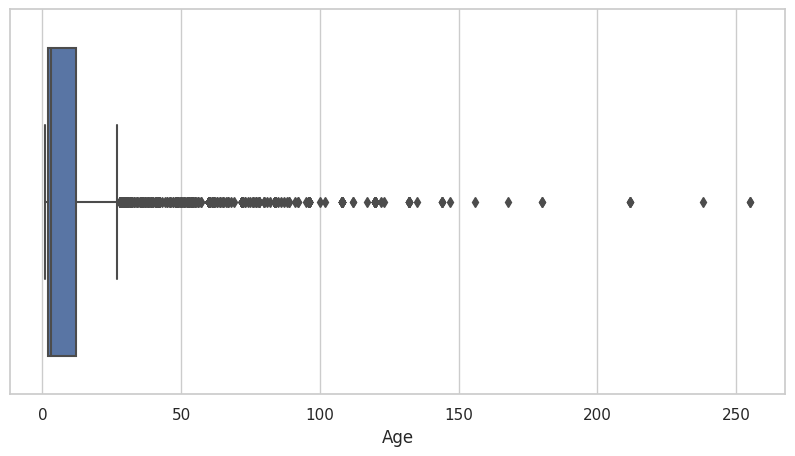

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Age', data=df_train, orient="h")

print(np.where(df_train['Age']>100))

(array([   81,   901,   953,  1459,  2038,  2078,  2247,  2519,  2913,
        3701,  4356,  4797,  4844,  5092,  5289,  5902,  6077,  6306,
        7315,  8590,  8722,  8834,  8879,  9003,  9393,  9707,  9745,
        9782,  9947, 10477, 10621, 10624, 10930, 11426, 11519, 11687,
       12304, 12365, 12582, 13121, 13631, 14245, 14454, 14519]),)


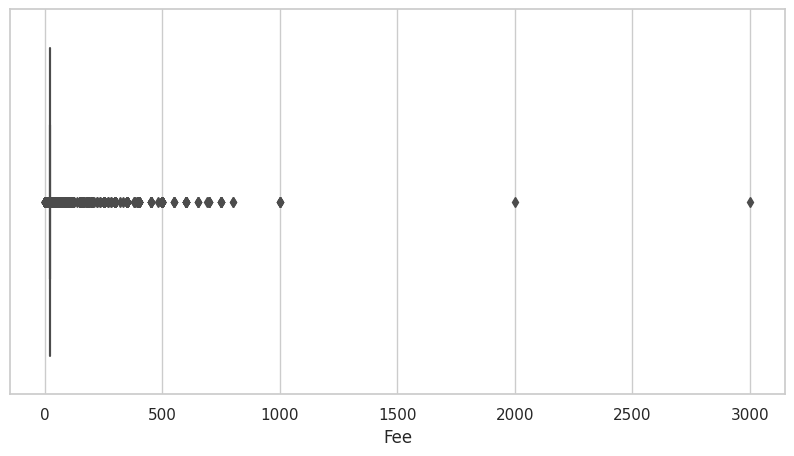

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Fee', data=df_train, orient="h")

print(np.where(df_train['Fee']>500))

(array([  263,   320,   396,   427,   823,  1088,  1302,  1305,  1377,
        1404,  1659,  2558,  2787,  2886,  3894,  4759,  5209,  5227,
        6091,  6291,  6332,  6997,  7094,  7847,  7875,  7966,  7993,
        8424,  8821,  9306,  9405,  9779,  9857,  9926, 11101, 11568,
       11729, 12792, 13383, 13596, 13599, 13865, 14583]),)


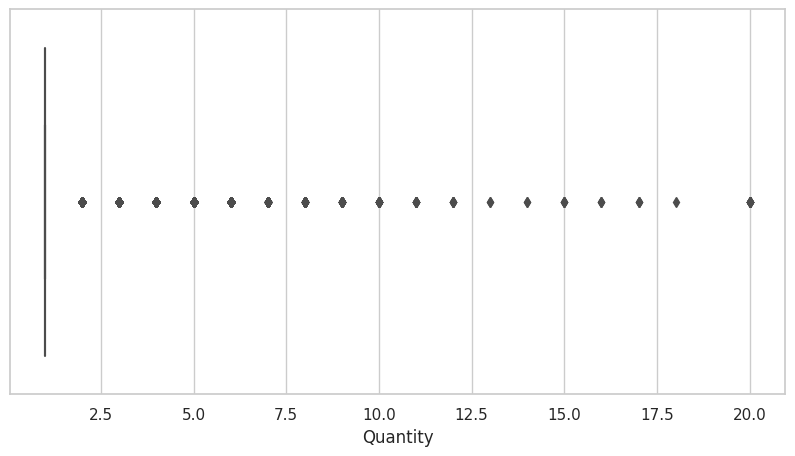

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Quantity', data=df_train, orient="h")

print(np.where(df_train['Quantity']>10))

### Data Preprocessing

* Data normalizarion, scaling and transformation

In [18]:
# Using standardization for scaling train data outliers

# For numeric columns
numeric_cols = ['Age', 'Fee', 'Quantity']
numeric_cols_scaled = ['AgeScaled', 'FeeScaled', 'QuantityScaled']

for column in numeric_cols:
  df_train[numeric_cols_scaled] = (df_train[numeric_cols] - df_train[numeric_cols].mean()) / df_train[numeric_cols].std()

df_train.tail(2)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,AgeScaled,FeeScaled,QuantityScaled
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4,-0.082032,-0.243348,-0.391224
14992,1,Fili,1,307,307,1,2,0,0,2,...,41332,9ed1d5493d223eaa5024c1a031dbc9c2,0,Fili just loves laying around and also loves b...,a83d95ead,1.0,3,-0.523092,-0.243348,-0.391224


In [19]:
# Using standardization for scaling test data outliers

# For numeric columns
numeric_cols = ['Age', 'Fee', 'Quantity']
numeric_cols_scaled = ['AgeScaled', 'FeeScaled', 'QuantityScaled']

for column in numeric_cols:
  df_test[numeric_cols_scaled] = (df_test[numeric_cols] - df_test[numeric_cols].mean()) / df_test[numeric_cols].std()

df_test.tail(2)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AgeScaled,FeeScaled,QuantityScaled
3970,1,Smokey,24,307,0,2,5,7,0,2,...,21.769637,41325,087903c2819a6297519c93d962b488d5,0,"smokey is good family pet. very obedient,so lo...",fd80b8c80,3.0,0.725031,-0.25028,-0.397970
3971,2,Unknown,1,266,0,3,1,7,0,1,...,21.769637,41326,041876679ae0261e3ee4aefe9e66316f,0,Found abandoned with the mother at nearby shop...,493ed84ae,1.0,-0.591002,-0.25028,2.934107


### Exploring the correlation within features and the target variable:

* Upon analyzing the frequency counts for pet types (1 for 'Dog' and 2 for 'Cat') and Adoption Speed (target variable).
* The Adoption Speed is a categorical feature that represents the speed of adoption. For instance, lower is faster.

* **We should use Chi-squared test for the association between each categorical variable and the target variable**

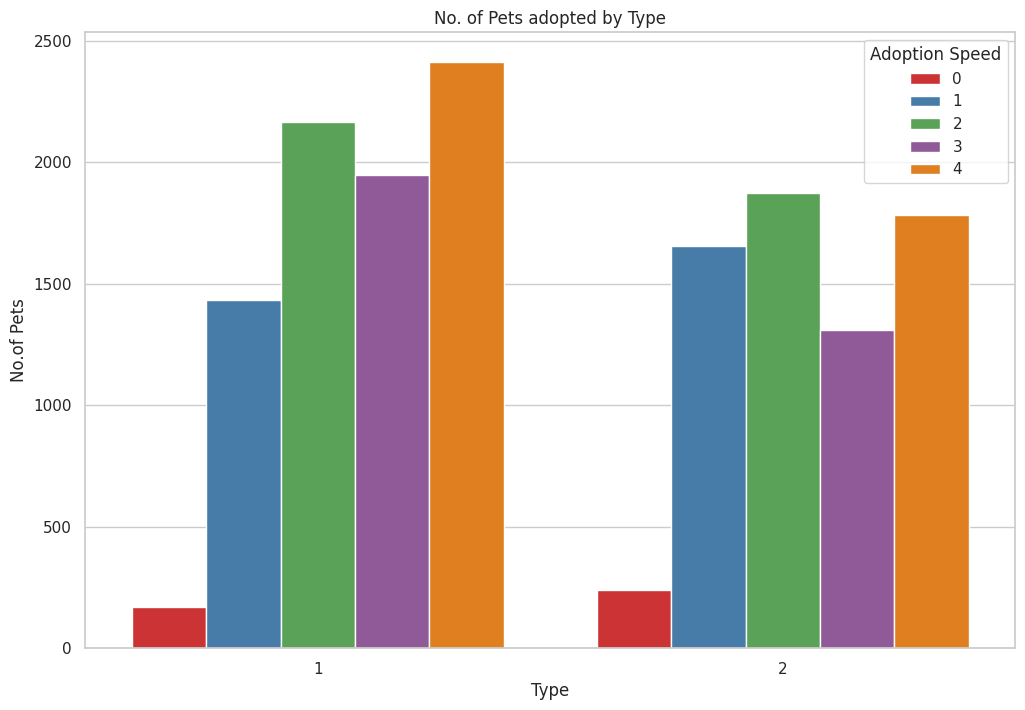

In [21]:
plt.figure(figsize=(12,8))
axis = sns.countplot(x = "Type", hue = "AdoptionSpeed", palette = "Set1", data = df_train)
axis.set(title = "No. of Pets adopted by Type", xlabel = "Type",ylabel = "No.of Pets")
plt.legend(loc='upper right', title='Adoption Speed')
plt.show()

It's observed there are slightly more Dogs than Cats and the Cats are adopted a bit faster.

In [22]:
df_dogs = df_train[df_train['Type']==1]
df_dogs[['AdoptionSpeed', 'PetID']].groupby(['AdoptionSpeed'], as_index=False).count().sort_values(by='AdoptionSpeed', ascending=True)

,AdoptionSpeed,PetID
0,0,170
1,1,1435
2,2,2164
3,3,1949
4,4,2414


In [23]:
df_cats = df_train[df_train['Type']==2]
df_cats[['AdoptionSpeed', 'PetID']].groupby(['AdoptionSpeed'], as_index=False).count().sort_values(by='AdoptionSpeed', ascending=True)

,AdoptionSpeed,PetID
0,0,240
1,1,1655
2,2,1873
3,3,1310
4,4,1783


* The following feature provides the gender of pet. It is coded as follows: 1 for 'Male', 2 for 'Female', and 3 for 'Mixed' when the profile represents a group of pets.

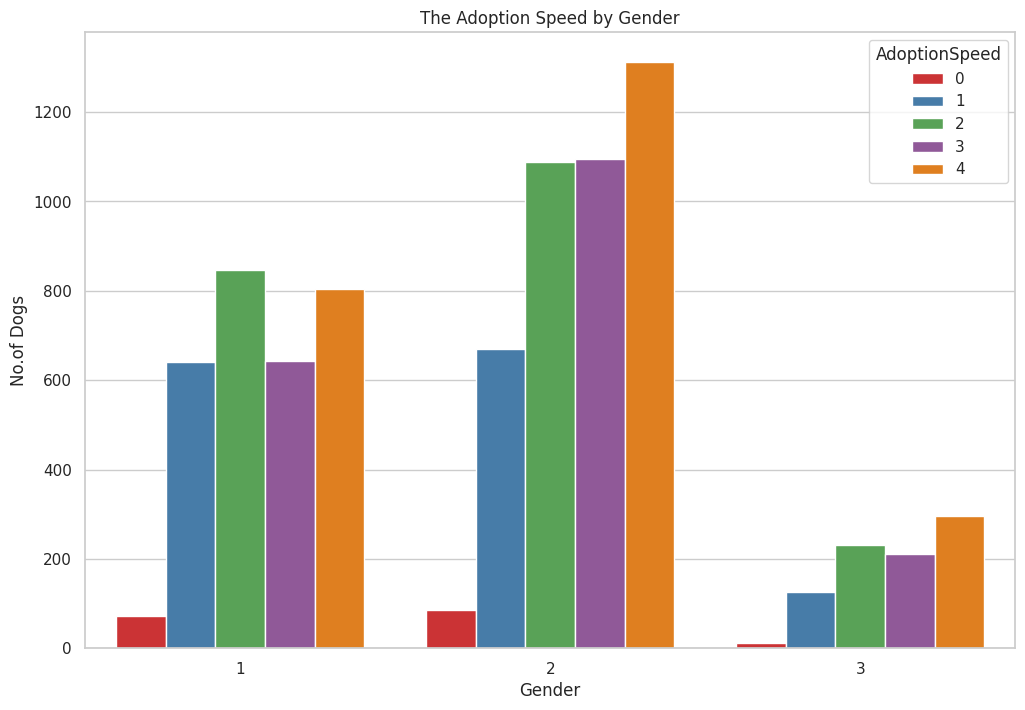

In [24]:
plt.figure(figsize=(12,8))
axis = sns.countplot(x = "Gender", hue = "AdoptionSpeed", palette = "Set1", data = df_dogs )
axis.set(title = "The Adoption Speed by Gender", xlabel = "Gender",ylabel = "No.of Dogs")
plt.show()

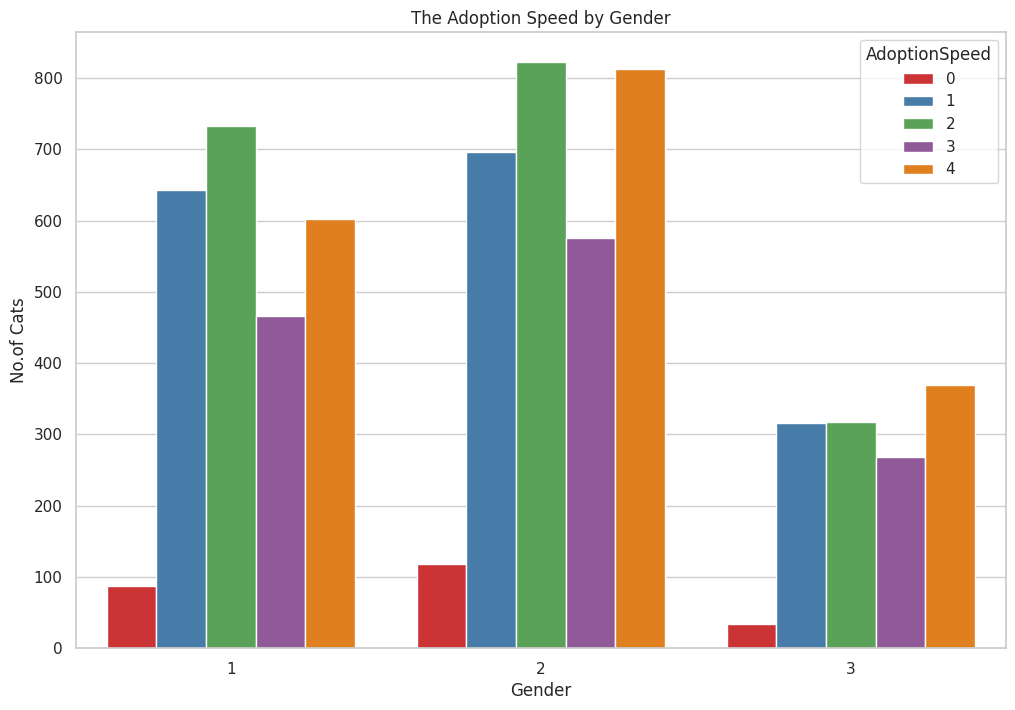

In [25]:
plt.figure(figsize=(12,8))
axis = sns.countplot(x = "Gender", hue = "AdoptionSpeed", palette = "Set1", data = df_cats )
axis.set(title = "The Adoption Speed by Gender", xlabel = "Gender",ylabel = "No.of Cats")
plt.show()

Both types of pets showed that females have a higher adoption speed than males.

In [26]:
# Adding Gender labels
df_train['GenderName'] = df_train['Gender'].map({1:'Male', 2:'Female', 3:'Mixed'})

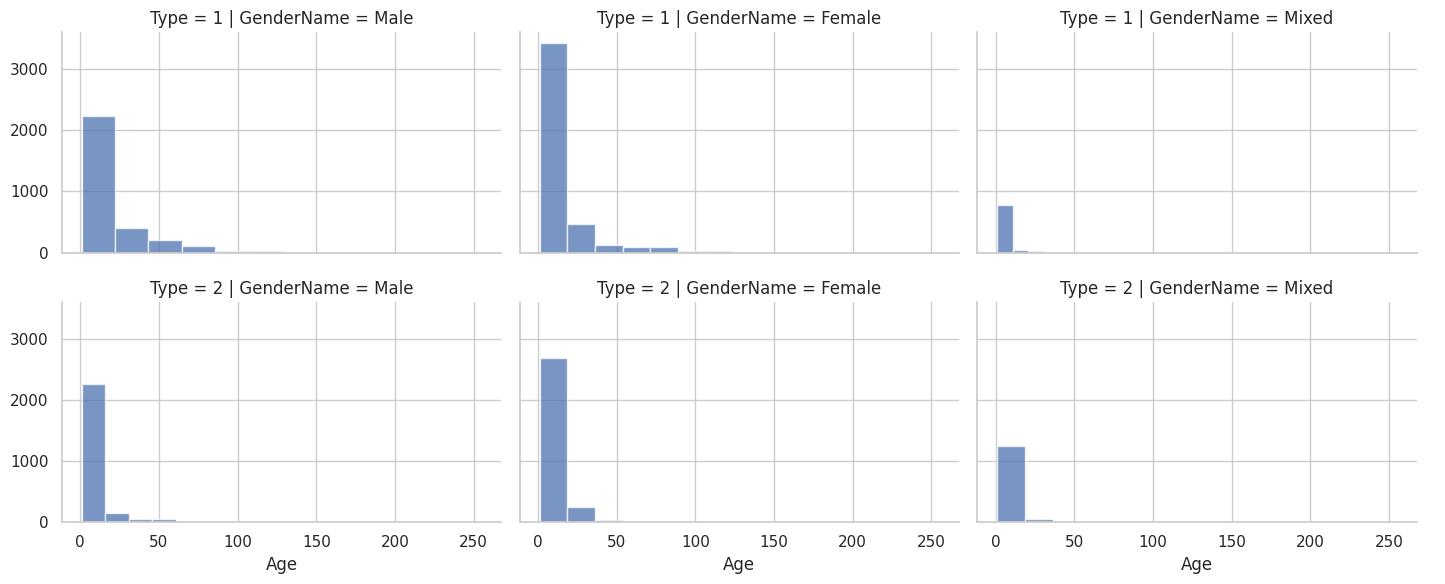

In [28]:
grid = sns.FacetGrid(df_train, col='GenderName',row='Type', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.75, bins=12)
grid.add_legend()

Examining the chart above, we can observe a broad distribution of age among female cats and dogs.

The pets exhibited a high distribution in age, indicating they were recently born.

It also indicates that pets with mixed genders had the lowest age distribution.

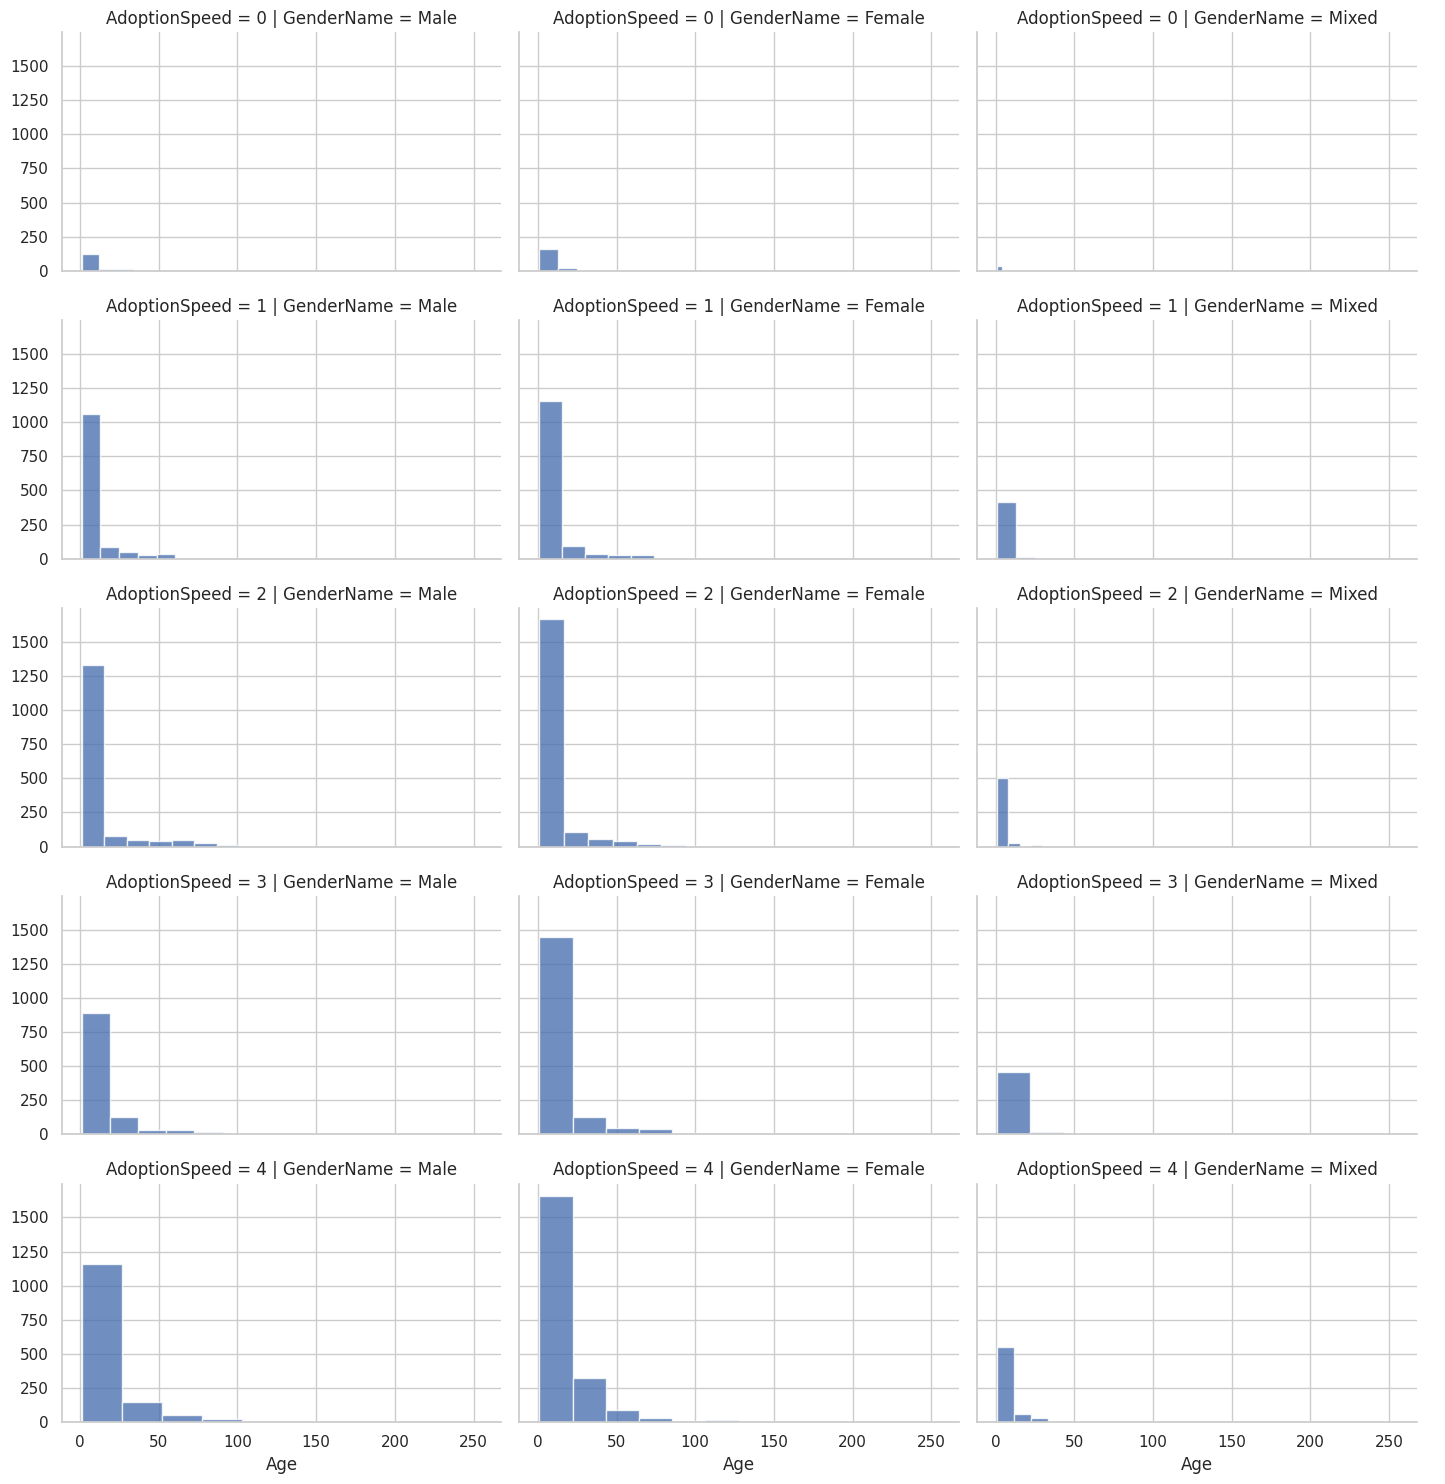

In [29]:
grid = sns.FacetGrid(df_train, col='GenderName',row='AdoptionSpeed', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.8, bins=10)
grid.add_legend()

The chart above illustrates the age distribution for cats and dogs by gender and their adoption speed.

In [30]:
df_train.corr()

<ipython-input-30-81897f4db25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,AgeScaled,FeeScaled,QuantityScaled
Type,1.000000,-0.147038,0.057724,-0.043568,0.060843,0.097680,0.246333,0.201693,-0.171811,0.003036,...,-0.006864,0.036423,-0.047583,0.124549,-0.005967,0.049368,-0.091240,-0.147038,-0.047583,0.036423
Age,-0.147038,1.000000,-0.314597,-0.041049,-0.122215,0.089955,-0.039586,-0.052880,0.093094,0.152823,...,0.103728,-0.111202,0.089362,0.024514,-0.016085,-0.084709,0.100126,1.000000,0.089362,-0.111202
Breed1,0.057724,-0.314597,1.000000,-0.157053,0.071321,-0.035510,-0.007081,-0.000682,-0.010507,-0.108059,...,-0.034893,0.090194,-0.190975,-0.026832,0.020626,0.043395,0.107834,-0.314597,-0.190975,0.090194
Breed2,-0.043568,-0.041049,-0.157053,1.000000,0.056907,-0.020324,0.003015,0.035679,0.049879,0.106220,...,-0.029285,0.038125,0.010657,-0.037993,0.001569,0.045953,-0.018642,-0.041049,0.010657,0.038125
Gender,0.060843,-0.122215,0.071321,0.056907,1.000000,-0.115351,0.026507,0.259309,-0.091819,-0.030404,...,-0.045177,0.494489,-0.047893,0.002564,0.016816,0.098435,0.057622,-0.122215,-0.047893,0.494489
Color1,0.097680,0.089955,-0.035510,-0.020324,-0.115351,1.000000,-0.113290,-0.282897,-0.029468,0.066967,...,0.024410,-0.116688,0.050779,0.024012,-0.006435,-0.041323,-0.044192,0.089955,0.050779,-0.116688
Color2,0.246333,-0.039586,-0.007081,0.003015,0.026507,-0.113290,1.000000,0.088742,-0.065155,-0.008764,...,-0.004307,0.019876,-0.018441,0.026944,0.023983,0.059113,-0.038579,-0.039586,-0.018441,0.019876
Color3,0.201693,-0.052880,-0.000682,0.035679,0.259309,-0.282897,0.088742,1.000000,-0.051730,0.013581,...,-0.024782,0.272548,-0.020458,0.010554,0.019526,0.103662,-0.007014,-0.052880,-0.020458,0.272548
MaturitySize,-0.171811,0.093094,-0.010507,0.049879,-0.091819,-0.029468,-0.065155,-0.051730,1.000000,0.095142,...,-0.012957,-0.042832,0.040549,-0.062584,0.017032,0.015593,0.045653,0.093094,0.040549,-0.042832
FurLength,0.003036,0.152823,-0.108059,0.106220,-0.030404,0.066967,-0.008764,0.013581,0.095142,1.000000,...,0.028096,-0.038388,0.158679,-0.029317,-0.014740,-0.031557,-0.091337,0.152823,0.158679,-0.038388


In [31]:
# Compute the correlation between features and the target variable (e.g., 'AdoptionSpeed')
corr_to_target = df_train.corr()['AdoptionSpeed'].abs().sort_values(ascending=False)

# Display the top N features with the highest absolute correlation to the target variable
top_n = 19 # Change this number to display a different number of top features
top_features_to_target = corr_to_target[1:top_n]  # Exclude the target variable
print("Top", top_n, "features with highest correlation to the target:")
print(top_features_to_target)

Top 19 features with highest correlation to the target:
Breed1            0.107834
Age               0.100126
AgeScaled         0.100126
FurLength         0.091337
Type              0.091240
Sterilized        0.083447
QuantityScaled    0.062931
Quantity          0.062931
Vaccinated        0.059043
Gender            0.057622
MaturitySize      0.045653
Color1            0.044192
Color2            0.038579
Health            0.029382
PhotoAmt          0.023233
Breed2            0.018642
Dewormed          0.013210
State             0.013119
Name: AdoptionSpeed, dtype: float64


<ipython-input-31-b2fef085a61e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_to_target = df_train.corr()['AdoptionSpeed'].abs().sort_values(ascending=False)


<ipython-input-32-0950cef5160c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr(method='spearman').round(2)


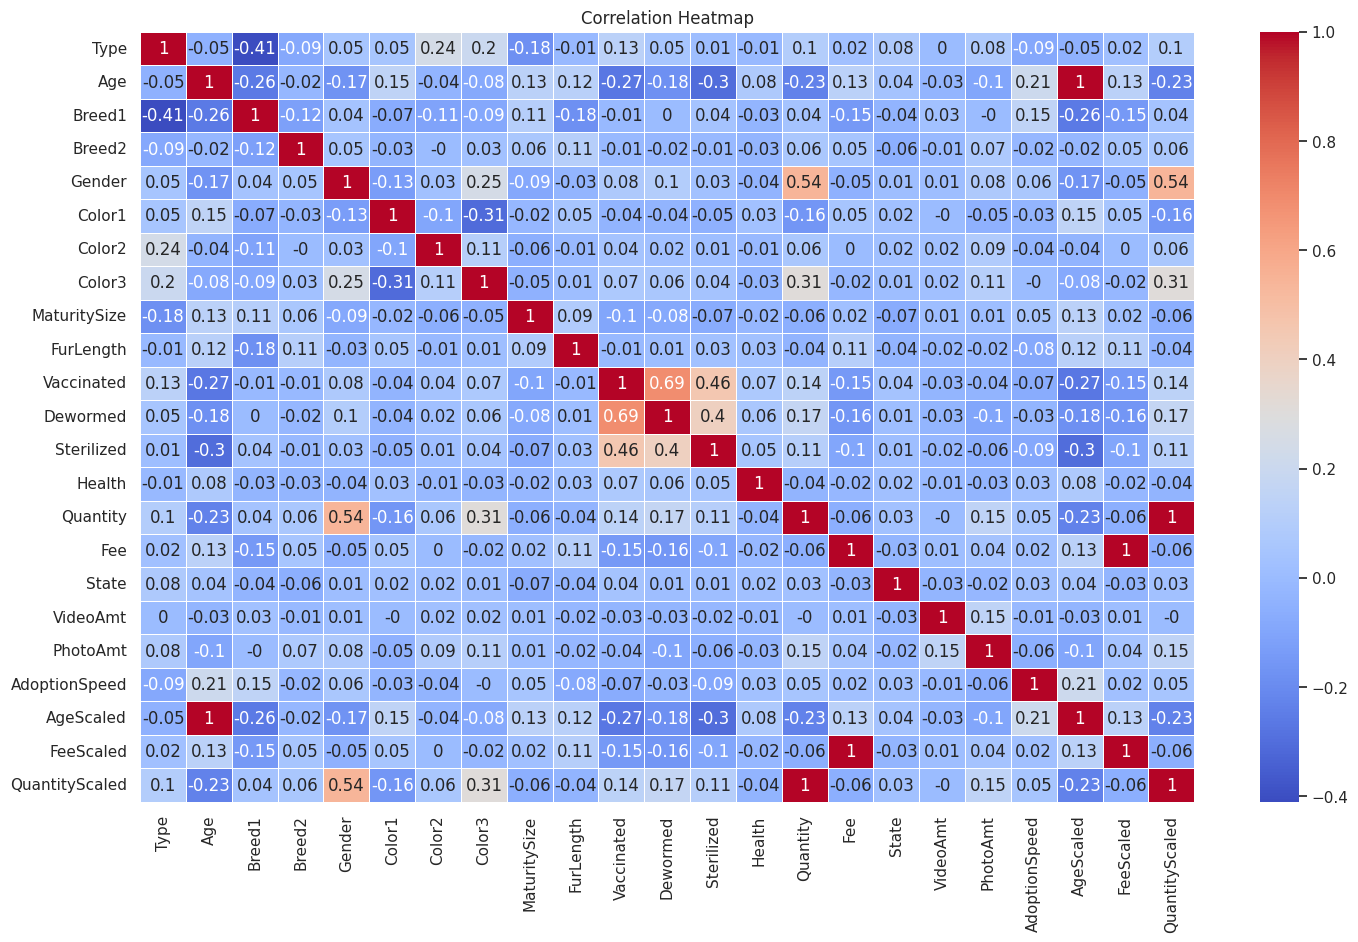

In [32]:
# Compute the correlation matrix between all features
correlation_matrix = df_train.corr(method='spearman').round(2)

plt.figure(figsize=(17,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidth = 0.5, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
# Specify the correlation threshold as values greater than 0.4 or less than -0.4
correlation_threshold = 0.4  # We can adjust this value

# Create a mask to identify pairs of features with correlation exceeding the threshold
high_correlation_mask = (abs(correlation_matrix) > correlation_threshold) & (correlation_matrix != 1.0)

# Identify the indices (pairs) of highly correlated features
high_correlation_pairs = [(i, j) for i in range(len(correlation_matrix.columns)) for j in range(i + 1, len(correlation_matrix.columns)) if high_correlation_mask.iloc[i, j]]

# Determine which feature to drop from each high-correlation pair
features_to_drop = []
for i, j in high_correlation_pairs:
    feature_i = correlation_matrix.columns[i]
    feature_j = correlation_matrix.columns[j]

    # Drop the feature with the higher index
    if i > j:
        features_to_drop.append(feature_i)
    else:
        features_to_drop.append(feature_j)

In [ ]:
features_to_drop = set(features_to_drop)
features_to_drop

{'Breed1', 'Dewormed', 'Quantity', 'Sterilized'}

### Feature Engineering

In [34]:
df_train.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'AgeScaled', 'FeeScaled', 'QuantityScaled', 'GenderName'],
      dtype='object')

In [35]:
# Adding features engineering for train dataset

# Concatenating Breed1, Age and Furlength features
df_train['Breed1AgeFurLength'] = (df_train['Breed1'].astype(str) + np.abs(df_train['AgeScaled']).astype(str) + df_train['FurLength'].astype(str)).astype(float)

# Concatenating binary features such as Vaccinated, Dewormed and Sterilized
df_train['VDSCombination'] = (df_train['Vaccinated'].astype(str) + df_train['Dewormed'].astype(str) + df_train['Sterilized'].astype(str)).astype(float)

# Creating a color count feature without including cases where any color is 0
df_train['ColorCount'] = df_train[['Color1', 'Color2', 'Color3']].apply(lambda row: len([color for color in row if color != 0]), axis=1)

# Creating a total visual media feature
df_train['TotalVisualMedia'] = df_train['PhotoAmt'] + df_train['VideoAmt']

# Creating a description length feature
df_train['DescriptionLength'] = df_train['Description'].apply(lambda x: len(str(x)))

# Creating a sentiment score feature
from textblob import TextBlob
df_train['SentimentScore'] = df_train['Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [36]:
# Adding features engineering for test dataset

# Concatenating Breed1, Age and Furlength features
df_test['Breed1AgeFurLength'] = (df_test['Breed1'].astype(str) + np.abs(df_test['AgeScaled']).astype(str) + df_test['FurLength'].astype(str)).astype(float)

# Concatenating binary features such as Vaccinated, Dewormed and Sterilized
df_test['VDSCombination'] = (df_test['Vaccinated'].astype(str) + df_test['Dewormed'].astype(str) + df_test['Sterilized'].astype(str)).astype(float)

# Creating a color count feature without including cases where any color is 0
df_test['ColorCount'] = df_test[['Color1', 'Color2', 'Color3']].apply(lambda row: len([color for color in row if color != 0]), axis=1)

# Creating a total visual media feature
df_test['TotalVisualMedia'] = df_test['PhotoAmt'] + df_test['VideoAmt']

# Creating a description length feature
df_test['DescriptionLength'] = df_test['Description'].apply(lambda x: len(str(x)))

# Creating a sentiment score feature
from textblob import TextBlob
df_test['SentimentScore'] = df_test['Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [37]:
# Adding image features to dataset

# First finding the position of '-' in PetID
df_image['pos'] = df_image['PetID'].str.find('-')
df_image.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

# Using position to slice PetID using a lambda function
df_image['PetID'] = df_image.apply(lambda x: x['PetID'][0:x['pos']],axis=1)
df_image.drop(columns=['pos'], axis=1, inplace=True)

df_train = pd.merge(df_train, df_image, how="inner", on=["PetID"], copy=True)

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58311 entries, 0 to 58310
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                58311 non-null  int64  
 1   Name                58311 non-null  object 
 2   Age                 58311 non-null  int64  
 3   Breed1              58311 non-null  int64  
 4   Breed2              58311 non-null  int64  
 5   Gender              58311 non-null  int64  
 6   Color1              58311 non-null  int64  
 7   Color2              58311 non-null  int64  
 8   Color3              58311 non-null  int64  
 9   MaturitySize        58311 non-null  int64  
 10  FurLength           58311 non-null  int64  
 11  Vaccinated          58311 non-null  int64  
 12  Dewormed            58311 non-null  int64  
 13  Sterilized          58311 non-null  int64  
 14  Health              58311 non-null  int64  
 15  Quantity            58311 non-null  int64  
 16  Fee 

In [39]:
# Compute the correlation between features and the target variable (e.g., 'AdoptionSpeed')
corr_to_target = df_train.corr()['AdoptionSpeed'].abs().sort_values(ascending=False)

# Display the top N features with the highest absolute correlation to the target
top_n = 16 # Change this number to display a different number of top features
top_features_to_target = corr_to_target[1:top_n]  # Exclude the target variable
print("Top", top_n, "features with highest correlation to the target:")
print(top_features_to_target)

<ipython-input-39-f26c33b7cdd8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_to_target = df_train.corr()['AdoptionSpeed'].abs().sort_values(ascending=False)


Top 16 features with highest correlation to the target:
Sterilized            0.142998
Age                   0.114441
AgeScaled             0.114441
Vaccinated            0.112167
Type                  0.112119
VDSCombination        0.111070
FurLength             0.097280
Breed1                0.092313
num_checkpoints       0.085741
Contrast              0.085530
Correlation           0.085019
Breed1AgeFurLength    0.078735
QuantityScaled        0.063614
Quantity              0.063614
Dewormed              0.062410
Name: AdoptionSpeed, dtype: float64


In [40]:
# Columns to add

# Columns to drop (To be analyze)
# df_train.drop(columns=['Breed1', 'Dewormed', 'Quantity', 'Sterilized'], inplace=True)

# Dropping label GenderName
df_train.drop('GenderName', axis=1, inplace=True)

# Print the resulting DataFrame
df_train.head()

# Save the resulting in a csv file
df_train.to_csv('preliminary_features.csv')

## Machine learning

### Splitting, Scaling & Modeling

In [41]:
# Import library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Separate the target variable 'AdoptionSpeed from the features
predictor_variables = ['Age', 'Vaccinated', 'Type', 'VDSCombination', 'FurLength',
                       'num_checkpoints', 'Contrast', 'Correlation', 'Gender',
                       'SentimentScore', 'Color1', 'TotalVisualMedia', 'PhotoAmt']
target_variable = ['AdoptionSpeed']

x = df_train[predictor_variables]
y = df_train[target_variable]

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Transforming "x_train"
x_train = scaler.fit_transform(x_train)

# Transforming "x_test"
x_test = scaler.transform(x_test)

pd.DataFrame(x_train,columns=predictor_variables).head()

,Age,Vaccinated,Type,VDSCombination,FurLength,num_checkpoints,Contrast,Correlation,Gender,SentimentScore,Color1,TotalVisualMedia,PhotoAmt
0,-0.370902,0.468319,-0.961422,0.364292,-0.76759,0.787709,-0.019876,-0.236922,-1.171434,0.195129,-0.688265,0.645129,0.169157
1,0.901638,0.468319,-0.961422,0.349832,0.92954,0.987606,2.560027,-2.671266,-1.171434,-0.863631,0.489512,0.142788,0.169157
2,-0.431499,0.468319,-0.961422,0.508897,-0.76759,-0.098041,-0.567471,0.661889,-1.171434,-0.813094,-0.688265,-0.359554,-0.349560
3,-0.431499,-1.091102,-0.961422,-1.081760,0.92954,-0.670159,-0.527925,0.535995,0.229023,1.373584,1.667288,-0.359554,-0.349560
4,-0.431499,-1.091102,-0.961422,-0.937155,-0.76759,0.038096,-0.419508,0.623259,0.229023,-0.342775,-0.688265,-0.359554,-0.349560


### Model 1: Decision Tree Classifier

In [42]:
# Create and train using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(criterion="entropy", max_depth=4)

model.fit(x_train, y_train)
y_pred_decision_tree = model.predict(x_test)

# Evaluate the accuracy score
acc_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
acc_decision_tree

0.36749742768949356

### Model 2: Support Vector Classification

In [43]:
# Create and train using SVC
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(x_train, y_train)
y_pred_svc = model.predict(x_test)

# Evaluate the accuracy score
acc_svc =  accuracy_score(y_test, y_pred_svc)
acc_svc

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4387790099462673

### Model 3: Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred_rf = model.predict(x_test)

# Evaluate the accuracy score
model.score(x_train, y_train)
acc_random_forest = accuracy_score(y_test, y_pred_rf)
acc_random_forest

<ipython-input-44-04f877d0ad70>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


0.8153652680919172

In [45]:
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix

print(classification_report(y_test, y_pred_rf))
print('*'*100)
pd.DataFrame(confusion_matrix(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.59      0.74       384
           1       0.79      0.78      0.78      3405
           2       0.81      0.83      0.82      4975
           3       0.90      0.80      0.85      4574
           4       0.76      0.85      0.80      4156

    accuracy                           0.82     17494
   macro avg       0.84      0.77      0.80     17494
weighted avg       0.82      0.82      0.82     17494

****************************************************************************************************


,0,1,2,3,4
0,228,46,36,21,53
1,4,2661,321,102,317
2,3,285,4144,161,382
3,0,199,313,3680,382
4,1,195,278,131,3551
